# Data Science in Transportation
## Step-by-step tutorial with `python` `pandas` and NYC citi bikes data
(c) Rafal Kucharski Cracow University of Technology, Poland, rkucharski_at_pk.edu.pl

In this demo you will:
* download the online data
* parse it to `pandas DataFrame`


# Prerequisites
Before you start make sure you have installed:
* [python](https://www.python.org/downloads/) (tested for 3.6.3 version)
* python IDE (personally I reccommend [pyCharm](https://www.jetbrains.com/pycharm/))
* pip integrated with shell, so that `pip install pandas` will work

Imports

In [64]:
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
import plotly.plotly as py
import requests
from plotly.graph_objs import Data, Scattermapbox, Marker, Layout, Box
topsize = 30
PLOTLY_API_KEY = "w1LROCX3bYA8amfuLA4g"
import warnings
warnings.filterwarnings('ignore')

# Data source
We use freely available datasets provided by _citi bike_ available [here](https://www.citibikenyc.com/system-data)
in this tutorial we focus on the historical data sets provided in this [amazon bucket](https://s3.amazonaws.com/tripdata/index.html)
for stability I copied three selected months (summer 2017) data in the repo [folder](https://github.com/RafalKucharskiPK/DataScience_for_TransportationResearch/tree/master/data)



## Data import
Here we:
* walk through the `./data/` folder, 
* unzip all .zip archives to '.csv' (on the fly - no files are stored)
* parse all `.csv.` files to `pandas DataFrame`
* index the `DataFrame` by datatime index (useful for futher time related calculations)

In [2]:
trips = list()
plot_x = list()
plot_y = list()
for file in os.listdir("./data/"):
    if file.endswith(".zip"):
        zip_ref = zipfile.ZipFile(os.path.join("./data/", file), 'r')
        df = pd.read_csv(zip_ref.extract(zip_ref.filelist[0]))
        df["starttime"] = pd.to_datetime(df["starttime"], format="%Y/%m/%d %H:%M:%S")
        df.index = df["starttime"]
        del df["starttime"]
        trips.append(df)

        plot_x.append(file.split("-")[0])
        plot_y.append(trips[-1].shape[0])
        print("Reading {}MB file of {:,} trips recorded on {}"
              .format(int(os.path.getsize(os.path.join("./data/", file)) / 1024 / 1024.0), trips[-1].shape[0], file.split("-")[0]))

trips = pd.concat(trips)

# delete unused data
del trips['stoptime']
del trips['start station name']
del trips['end station name']

Reading 60MB file of 1,816,498 trips recorded on 201708
Reading 57MB file of 1,735,599 trips recorded on 201707
Reading 57MB file of 1,731,594 trips recorded on 201706


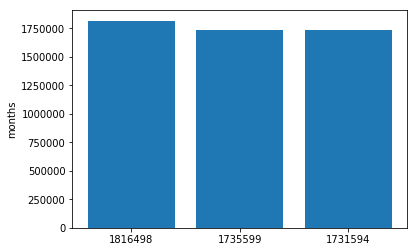

In [3]:
plt.bar([i for i, x in enumerate(plot_x)], plot_y)
plt.xticks([i for i, x in enumerate(plot_x)], plot_y)
plt.ylabel('number of bike rents')
plt.ylabel('months')
plt.show()

## Inspect, analyze, view the data

In [55]:
trips.columns # columns of the DataFrame


Index(['tripduration', 'start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station latitude',
       'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'],
      dtype='object')

In [56]:
print("Mean trip duration is: ", trips.tripduration.mean())

Mean trip duration is:  1097.52567646


In [57]:
print("Mean trip duration in July is : ", trips.tripduration[trips.index.month==7].mean())

Mean trip duration in July is :  1060.14335973


In [58]:
print(trips[trips['start station id']==470].shape[0], " trips started at station 470")

12418  trips started at station 470


In [62]:
print("Top 10 destinations from station 470")
trips[trips['start station id']==470].groupby('end station id').size().sort_values(ascending=False).head(10)

Top 10 destinations from station 470


end station id
3255    445
459     415
435     385
494     297
523     294
212     264
462     233
402     218
3258    182
382     176
dtype: int64

In [36]:
print(trips.head()) # brief inspection of first 10 rows of Data

                     tripduration  start station id  start station latitude  \
starttime                                                                     
2017-08-01 00:00:00          2110               470               40.743453   
2017-08-01 00:00:10           160               348               40.724910   
2017-08-01 00:00:17          1644              3165               40.775794   
2017-08-01 00:00:27           323               389               40.710446   
2017-08-01 00:00:41           109              3145               40.778627   

                     start station longitude  end station id  \
starttime                                                      
2017-08-01 00:00:00               -74.000040            3289   
2017-08-01 00:00:10               -74.001547             151   
2017-08-01 00:00:17               -73.976206            3320   
2017-08-01 00:00:27               -73.965251            3073   
2017-08-01 00:00:41               -73.957721            3147  

In [35]:
trips.describe()  # general statistical description of data in DataFrame columns

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,5.283691e+06,5.283691e+06,5.283691e+06,5.283691e+06,5.283691e+06,5.283691e+06,5.283691e+06,5.283691e+06,4.637947e+06,5.283691e+06
mean,1.097526e+03,1.352630e+03,4.073583e+01,-7.398516e+01,1.349570e+03,4.073554e+01,-7.398525e+01,2.324025e+04,1.979415e+03,1.105788e+00
std,1.500801e+04,1.342407e+03,3.808385e-02,4.869711e-02,1.341921e+03,4.554701e-02,6.666835e-02,5.012161e+03,1.158522e+01,5.887127e-01
min,6.100000e+01,7.200000e+01,0.000000e+00,-7.402535e+01,7.200000e+01,0.000000e+00,-7.406692e+01,1.452900e+04,1.874000e+03,0.000000e+00
25%,3.940000e+02,3.590000e+02,4.071755e+01,-7.399725e+01,3.590000e+02,4.071745e+01,-7.399726e+01,1.844300e+04,1.972000e+03,1.000000e+00
50%,6.690000e+02,4.850000e+02,4.073650e+01,-7.398766e+01,4.840000e+02,4.073649e+01,-7.398783e+01,2.522800e+04,1.982000e+03,1.000000e+00
75%,1.167000e+03,3.140000e+03,4.075514e+01,-7.397606e+01,3.139000e+03,4.075510e+01,-7.397621e+01,2.778800e+04,1.988000e+03,1.000000e+00
max,4.509256e+06,3.489000e+03,4.550636e+01,0.000000e+00,3.489000e+03,4.550636e+01,0.000000e+00,3.082700e+04,2.001000e+03,2.000000e+00


## Make stations

In [6]:

st = pd.DataFrame(np.union1d(trips['start station id'].unique(),
                             trips['end station id'].unique()),
                  columns=["station_id"])
locs = list()
sizes = list()
for index, row in st.iterrows():
    locs.append(
        [trips[trips['start station id'] == row["station_id"]]['start station longitude'].mean(),
         trips[trips['start station id'] == row["station_id"]]['start station latitude'].mean()]
    )
    sizes.append(trips[trips['start station id'] == row["station_id"]].shape[0])
st['pos'] = [Point(loc[0], loc[1]) for loc in locs]
st['lon'] = [loc[0] for loc in locs]
st['lat'] = [loc[1] for loc in locs]
st['orig_trips'] = sizes
stations = st.set_index("station_id")

## Plot stations

In [8]:
data = [Scattermapbox(
    lat=stations.lat, lon=stations.lon,
    mode='markers',
    marker=Marker(
        size=stations.orig_trips / 300 * stations.orig_trips.max(),
        opacity=0.7
    ),
    text="Station: " + str(stations.index),
    hoverinfo='text'
)]

layout = Layout(
    title='Stations of the system with their capacities',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=PLOTLY_API_KEY,
        bearing=0,
        center=dict(
            lat=40.73,
            lon=-73.93
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='CITI stations')

## Get Real-time data

In [67]:
json = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_status.json").json()
data = json['data']['stations']
station_information = pd.DataFrame(data)

In [78]:
print("Count empty stations")
station_information[station_information.num_bikes_available==0].shape[0]

Count empty stations


40

In [88]:
print("10 full stations")
station_information[station_information.num_docks_available==0].num_docks_available.nsmallest(10)

10 full stations


82     0
84     0
112    0
142    0
195    0
245    0
258    0
272    0
476    0
520    0
Name: num_docks_available, dtype: int64

## OD matrix

In [98]:
matrix = trips.groupby(by=['start station id', 'end station id'])
OD = matrix.size()  # make trip matrix
OD = OD.unstack().fillna(0)

In [93]:
OD.head()

end station id,72,79,82,83,116,119,120,127,128,143,...,3472,3474,3476,3477,3478,3479,3481,3485,3488,3489
start station id,,,,,,,,,,,,,,,,,,,,,
72,330.0,12.0,2.0,0.0,17.0,0.0,0.0,69.0,17.0,2.0,...,52.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,32.0,122.0,4.0,3.0,12.0,0.0,1.0,90.0,69.0,0.0,...,13.0,28.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,3.0,137.0,0.0,1.0,4.0,0.0,1.0,34.0,0.0,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,1.0,0.0,85.0,0.0,1.0,48.0,2.0,0.0,19.0,...,0.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0
116,40.0,22.0,6.0,0.0,178.0,0.0,1.0,155.0,54.0,0.0,...,35.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
relative_OD = matrix.size().groupby(level=0).apply(lambda x: x / float(x.sum()))
relative_OD = relative_OD.unstack().fillna(0)
relative_OD.head()

end station id,72,79,82,83,116,119,120,127,128,143,...,3472,3474,3476,3477,3478,3479,3481,3485,3488,3489
start station id,,,,,,,,,,,,,,,,,,,,,
72,0.026213,0.000953,0.000159,0.000000,0.001350,0.000000,0.000000,0.005481,0.001350,0.000159,...,0.004131,0.000874,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
79,0.003548,0.013528,0.000444,0.000333,0.001331,0.000000,0.000111,0.009980,0.007651,0.000000,...,0.001442,0.003105,0.000111,0.000111,0.000000,0.0,0.0,0.0,0.0,0.0
82,0.000000,0.000738,0.033711,0.000000,0.000246,0.000984,0.000000,0.000246,0.008366,0.000000,...,0.000984,0.000738,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
83,0.000000,0.000205,0.000000,0.017414,0.000000,0.000205,0.009834,0.000410,0.000000,0.003893,...,0.000000,0.000205,0.000000,0.000205,0.001024,0.0,0.0,0.0,0.0,0.0
116,0.003093,0.001701,0.000464,0.000000,0.013762,0.000000,0.000077,0.011984,0.004175,0.000000,...,0.002706,0.000696,0.000077,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
